In [1]:
import pandas as pd
import numpy as np

### Importing our Dataset

In [2]:
CancerData = pd.read_excel("Innovaccer/BreastCancer_Prognostic_v1.xlsx")
CancerData

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,943471,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,94547,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


In [3]:
columns_list = list(CancerData.columns)
columns_list.remove("ID")
new = columns_list[2:] + columns_list[:2]
new
CancerData = CancerData[new]

In [33]:
CancerData = CancerData[CancerData["Lymph_Node_Status"] != "?"]
CancerData["Lymph_Node_Status"] = CancerData["Lymph_Node_Status"].astype("int64")
CancerData.Outcome[CancerData["Outcome"] == "R"] = 1
CancerData.Outcome[CancerData["Outcome"] == "N"] = 0
CancerData.Outcome = CancerData.Outcome.astype("int64")

C:\Users\bheru\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


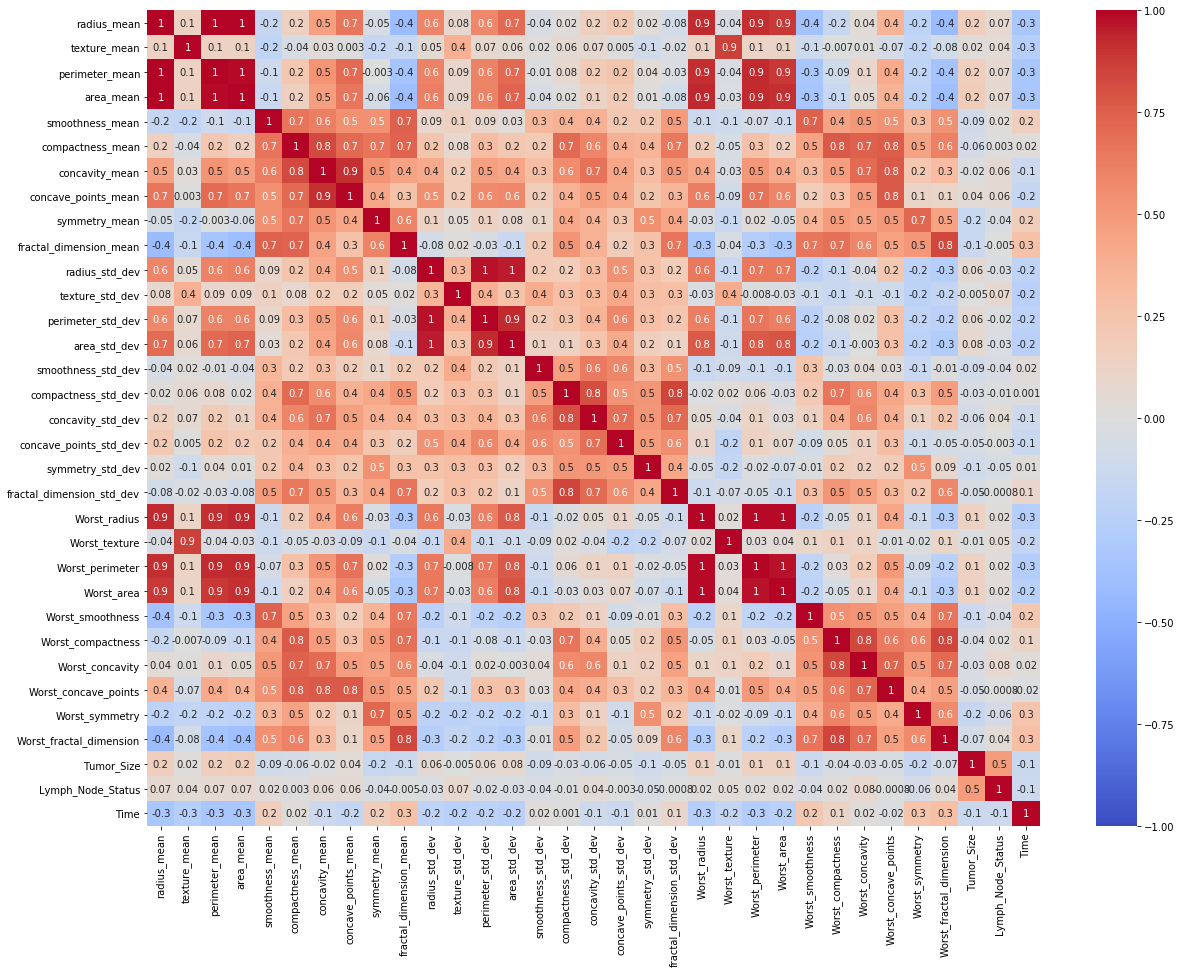

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
corr_data = CancerData.corr()
plt.subplots(figsize = (20,15))
sns.heatmap(corr_data, xticklabels=corr_data.columns, yticklabels=corr_data.columns, annot=True, fmt = ".1g",vmin = -1,vmax = 1,center = 0,cmap = "coolwarm")
plt.savefig("Heatmap.jpg")

### Important points to note - 
#### 1. Since Area and Perimeter are a function of radius. hence they have high correlation with the radius.
#### 2. Our cutoff Correlation coefficient range must be -0.8 to 0.8

In [7]:
from sklearn.metrics import confusion_matrix, f1_score

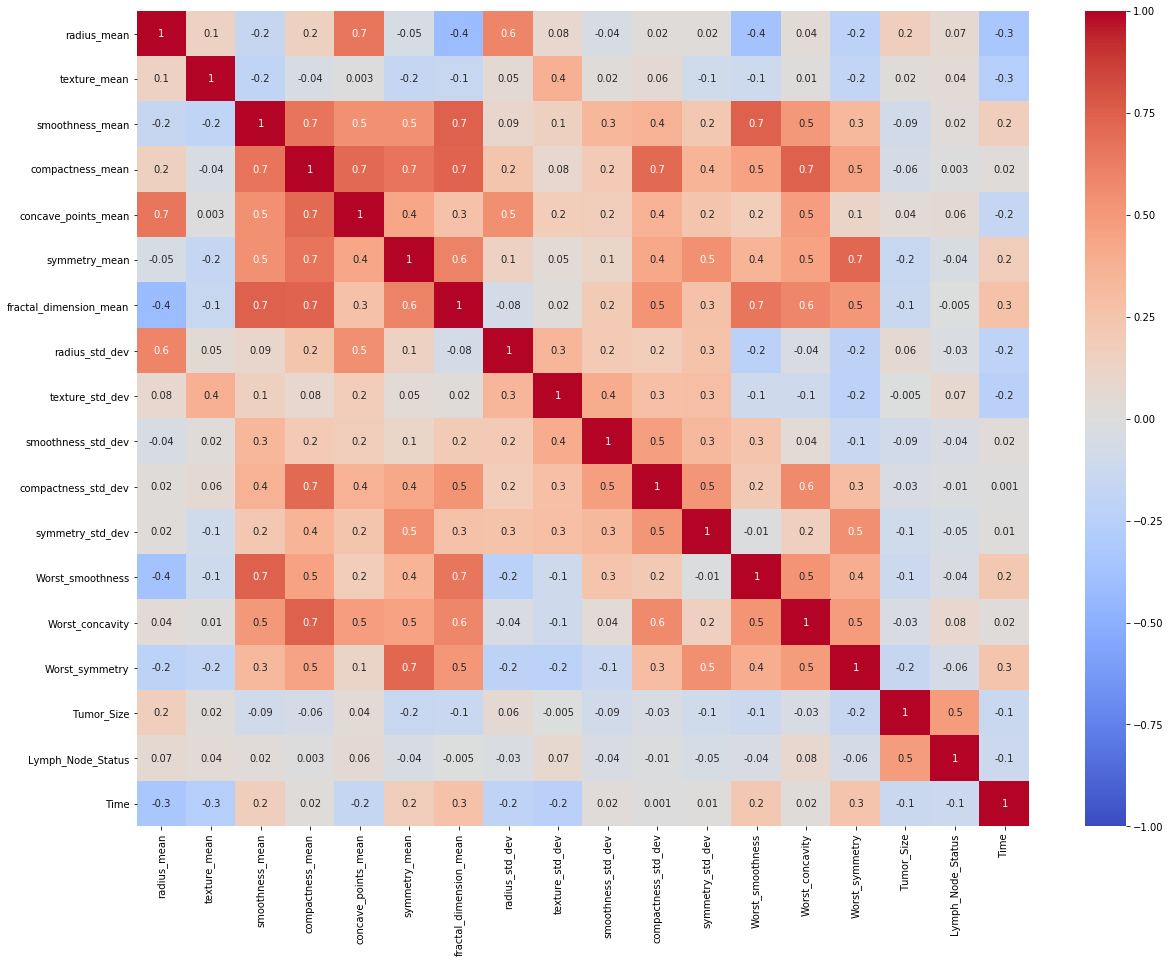

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
corr_data = CancerData_1.corr()
plt.subplots(figsize = (20,15))
sns.heatmap(corr_data, xticklabels=corr_data.columns, yticklabels=corr_data.columns, annot=True, fmt = ".1g",vmin = -1,vmax = 1,center = 0,cmap = "coolwarm")
plt.savefig("Used features Heatmap.jpg")

## Features

In [36]:
X = CancerData[['Time', 'radius_mean', 'texture_mean',
       'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave_points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_std_dev', 'texture_std_dev',
       'perimeter_std_dev', 'area_std_dev', 'smoothness_std_dev',
       'compactness_std_dev', 'concavity_std_dev', 'concave_points_std_dev',
       'symmetry_std_dev', 'fractal_dimension_std_dev', 'Worst_radius',
       'Worst_texture', 'Worst_perimeter', 'Worst_area', 'Worst_smoothness',
       'Worst_compactness', 'Worst_concavity', 'Worst_concave_points',
       'Worst_symmetry', 'Worst_fractal_dimension', 'Tumor_Size',
       'Lymph_Node_Status']]
Y = CancerData["Outcome"]

## Our Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 0,max_depth=3, min_samples_leaf=5) 
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [38]:
y_pred = clf_gini.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf_gini.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.85


## Confusion Matrix

In [39]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[45,  1],
       [ 8,  5]], dtype=int64)

## Recall Score

In [42]:
from sklearn.metrics import precision_recall_fscore_support
score = precision_recall_fscore_support(y_test, y_pred,average = "weighted")
print(score[1])

0.847457627118644


### Saving the predictions alongside the original values to a csv file

In [43]:
y_test

116    N
187    N
58     N
92     N
13     R
39     R
19     N
128    R
166    N
8      N
5      R
126    N
163    N
178    N
76     N
35     N
179    N
183    N
185    N
73     N
152    R
158    N
180    N
111    N
134    N
182    N
181    N
47     N
23     N
157    R
101    N
46     R
125    R
4      R
63     N
197    N
95     N
172    N
27     N
57     N
165    N
141    N
9      N
132    R
144    N
68     N
96     N
62     R
148    N
194    N
25     N
32     N
110    R
42     R
65     N
93     N
121    N
20     N
173    N
Name: Outcome, dtype: object

In [45]:
y_pred  = list(y_pred)

In [48]:
Classified = pd.DataFrame()
Classified["Actual"] = y_test
Classified["Predicted"] = y_pred
Classified.to_csv("Innovaccer/Classification/Classified.csv")